- 화소 : 색상을 가지는 점 하나
- RGB : 화소를 표현하는 단일색들(강도를 조절해서 표현)
- 레스터(raster) or 비트맵(bitmap) : 각 점 하나하나의 색상 값을 저장하는 방식 = 색상마다 2\*\*8 (256)
- 벡터 : 이미지의 상대적인 점과 선의 위치를 방정식으로 기록
  - 확대/축소에 따라 화소를 재계산
- YUY : 흑백 채널에다가 1/4의 해상도를 가진 두 색상 채널을 덧붙여서 송출
- HSV : Hue : 색상, Saturation : 채도, Value : 명도 - 직관적인 이해
- CMYK : Cyan, Magenta, Yellow, Black - 잉크 절감
- 이렇게 색을 표현하는 다양한 방식을 Color space 라고 한다.컬러 스페이스를 구성하는 단일 축(RGB에서 각 R,G,B)을 채널이라고 한다.


이미지는 결국 배열 형태의 데이터  
가로 세로 32 픽셀 RGB 3 =  
Numpy[32,32,3]  
dtype은 부호없는 8bit 정수 (unit8)


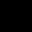

In [1]:
import numpy as np
from PIL import Image

data = np.zeros([32, 32, 3], dtype=np.uint8)
image = Image.fromarray(data, 'RGB')
image


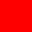

In [2]:
data[:, :] = [255, 0, 0]
image = Image.fromarray(data, 'RGB')
image


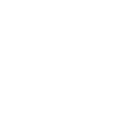

In [3]:
data = np.zeros([128, 128, 3], dtype=np.uint8)
data[:, :] = [255, 255, 255]
image = Image.fromarray(data, 'RGB')
image


흰색은 [255,255,255]를 넣어야합니다.


In [4]:
#- 문제 2 -#
from PIL import Image
import os

# 연습용 파일 경로
image_path = '/home/aiffel/Code/AiffelPractice/Practice6/pillow_practice.png'

# 이미지 열기
image = Image.open(image_path)

# width와 height 출력
print(image.width, image.height)

# JPG 파일 형식으로 저장해보기
image2 = image.convert("RGB")
image2.save("pillow_practice.jpeg")
# image2.show()

image3 = image.resize([100, 200])
image3.save("resize_pillow_practice.png")
# image3.show()

image4 = image.crop((300, 100, 600, 400))
image4.save("eye_pillow_practice.png")
# image4.show()


620 465


지금까지 이미지를 불러오고 저장방식을 바꿔보고 사이즈를 변경해보고 잘라보기를 해봤습니다.  
이제 CIFAR-100 dataset을 사용해봅시다.  
이는 32x32x3 화소 해상도의 이미지들이 100개의 클래스당 600장(학습 500, 테스트 100) 하여 총 6만장이 있습니다.  
이제 train을 가져와 봅시다.


In [5]:
import pickle

dir_path = '/home/aiffel/Code/AiffelPractice/Practice6/cifar-100-python'
train_file_path = os.path.join(dir_path, 'train')

with open(train_file_path, 'rb') as f:
    train = pickle.load(f, encoding='bytes')

print(type(train))
# print(train)   # 혹시 내용이 궁금하다면 주석을 풀고 실행해 보세요.


<class 'dict'>


train을 출력하니 너무 많은 내용이 나옵니다. dict 개체이니 어떤 key들이 있는지 살펴봅시다.


In [6]:
train.keys()


dict_keys([b'filenames', b'batch_label', b'fine_labels', b'coarse_labels', b'data'])

각 키의 문자열이 b로 되어있음(string이 아닌 byte)


In [7]:
print(type(train[b'filenames']))
train[b'filenames'][0:5]


<class 'list'>


[b'bos_taurus_s_000507.png',
 b'stegosaurus_s_000125.png',
 b'mcintosh_s_000643.png',
 b'altar_boy_s_001435.png',
 b'cichlid_s_000031.png']

In [8]:
train[b'data'][0:5]


array([[255, 255, 255, ...,  10,  59,  79],
       [255, 253, 253, ..., 253, 253, 255],
       [250, 248, 247, ..., 194, 207, 228],
       [124, 131, 135, ..., 232, 236, 231],
       [ 43,  32,  87, ...,  60,  29,  37]], dtype=uint8)

In [9]:
train[b'data'][0].shape


(3072,)

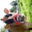

In [10]:
# 3072 = 32*32*3 RGB 순으로 넣기 위해 order = 'F' 사용
image_data = train[b'data'][0].reshape(
    [32, 32, 3], order='F')   # order를 주의하세요!!
image = Image.fromarray(image_data)    # Pillow를 사용하여 Numpy 배열을 Image객체로 만들어서
image    # 화면에 띄워 봅시다!!


이미지의 RGB 저장방식은 Red~, Green~, Blue~ 이다.  
여기서 그냥 order='C' (default) 를 쓰면 빨강끼리 초록끼리 파랑끼리 묶이므로  
한개씩 넣는 방법인 order='F'를 쓴다.

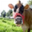

In [11]:
# X축과 Y축이 뒤집어져 나오기 때문에 축을 바꿔주는 작업
image_data = image_data.swapaxes(0, 1)
image = Image.fromarray(image_data)
image


In [12]:
from tqdm import tqdm
import numpy


dir_path = '/home/aiffel/Code/AiffelPractice/Practice6/cifar-100-python'
train_file_path = os.path.join(dir_path, 'train')

# image를 저장할 cifar-100-python의 하위 디렉토리(images)를 생성합니다.
images_dir_path = '/home/aiffel/Code/AiffelPractice/Practice6/cifar-images'
if not os.path.exists(images_dir_path):
    os.mkdir(images_dir_path)  # images 디렉토리 생성

# 32X32의 이미지 파일 50000개를 생성합니다.
# with open(train_file_path, 'rb') as f:
#     train = pickle.load(f, encoding='bytes')
#     for i in tqdm(range(len(train[b'filenames']))):
#         filename = train[b'filenames'][i].decode()
#         data = train[b'data'][i].reshape([32, 32, 3], order='F')
#         image = Image.fromarray(data.swapaxes(0, 1))
#         image.save(os.path.join(images_dir_path, filename))


encoding 되어있는 filenames를 decode하고 train에서 가져와서 reshape하고 각각 저장  
이제 opencv를 사용해봅시다.


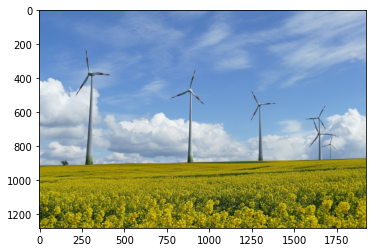

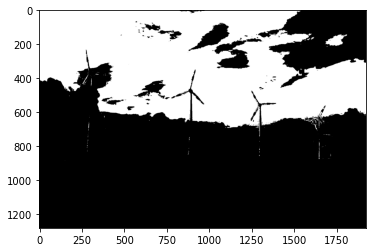

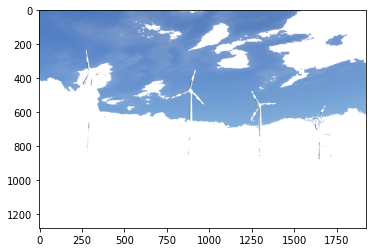

In [17]:
import cv2 as cv
from matplotlib import pyplot as plt

img_path = '/home/aiffel/Code/AiffelPractice/Practice6/cv_practice.png'
img = cv.imread(img_path)
# 이미지를 읽어온다.

# Convert BGR to HSV
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
# cvtColor는 컬러 스페이스 변환을 위한 함수

# define range of blue color in HSV
lower_blue = np.array([100, 100, 100])
upper_blue = np.array([130, 255, 255])

# Threshold the HSV image to get only blue colors
mask = cv.inRange(hsv, lower_blue, upper_blue)
# hsv 형식에서 blue를 해당 범위만 가져온다. 파란색 골라내는 마스크를 생성

# Bitwise-AND mask and original image
# res = cv.bitwise_and(img, img, mask=mask)
res = cv.bitwise_not(res, mask=mask)
res = cv.bitwise_not(res)
# 2개 비교해서 and 가져옴(여기선 img img), 단 mask를 넣어줘서 해당 영역만 따오도록 하기

plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv.cvtColor(res, cv.COLOR_BGR2RGB))
plt.show()
# opencvsms BGR이고 plt는 RGB 이니까 바꿔주기
